# 3 Logistic regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ConfusionMatrix
from sklearn.decomposition import PCA
from yellowbrick.classifier import ClassificationReport

plt.style.use("default")

In [2]:
%store -r X_data_clean
%store -r y
%store -r labels
%store -r X_img_clean

Let's first start by spliting our data into train, validation and test. We also do the image data at the same time to use random state so I make sure we have the same splits for the CSV data and the image data

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X_data_clean,y,test_size=250,stratify=y,random_state=0)
X_train_img,X_test_img,y_train_img,y_test_img = train_test_split(X_img_clean,y,test_size=250,stratify=y,random_state=0)

In [4]:
%store X_train
%store X_train_img
%store X_test
%store X_test_img

%store y_train
%store y_train_img
%store y_test
%store y_test_img

Stored 'X_train' (DataFrame)
Stored 'X_train_img' (ndarray)
Stored 'X_test' (DataFrame)
Stored 'X_test_img' (ndarray)
Stored 'y_train' (ndarray)
Stored 'y_train_img' (ndarray)
Stored 'y_test' (ndarray)
Stored 'y_test_img' (ndarray)


The first thing we need to do with a classification problem is to do a baseline for classification :

In [5]:
label_encoder = {0:'blues', 1:'classical', 2:'country', 3:'disco', 4:'hiphop', 5:'jazz',6:'metal', 7:'pop', 8:'reggae', 9:'rock'}
classes = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

In [6]:
%store label_encoder
%store classes

Stored 'label_encoder' (dict)
Stored 'classes' (list)


In [7]:
dummy = DummyClassifier(strategy="most_frequent")

/Users/jasonola/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


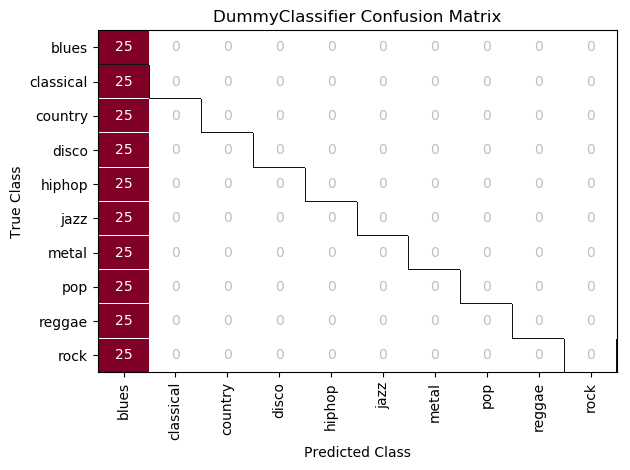

In [8]:
cm_dummy = ConfusionMatrix(dummy,classes=classes,label_encoder=label_encoder)
cm_dummy.fit(X_train,y_train)
cm_dummy.score(X_test,y_test)
cm_dummy.show();

So our score is 10% and we see the corresponding confusion matrix as above.  
Let's do our logistic regression now :

In [9]:
logreg_pipe = Pipeline([
    ("logreg",LogisticRegression(solver="liblinear"))
])

In [10]:
grid = {
    'logreg__C': np.logspace(-4, 4, num=9)
}
grid_cv = GridSearchCV(logreg_pipe, grid, cv=5, return_train_score=True)
grid_cv.fit(X_train,y_train);

In [11]:
cv_results = pd.DataFrame(grid_cv.cv_results_)
cols = ['mean_test_score', 'param_logreg__C']
cv_results[cols].sort_values('mean_test_score', ascending=False)

,mean_test_score,param_logreg__C
3,0.692000,0.1
4,0.685333,1
5,0.656000,10
6,0.621333,100
7,0.608000,1000
8,0.596000,10000
2,0.578667,0.01
1,0.453333,0.001
0,0.392000,0.0001


/Users/jasonola/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/Users/jasonola/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


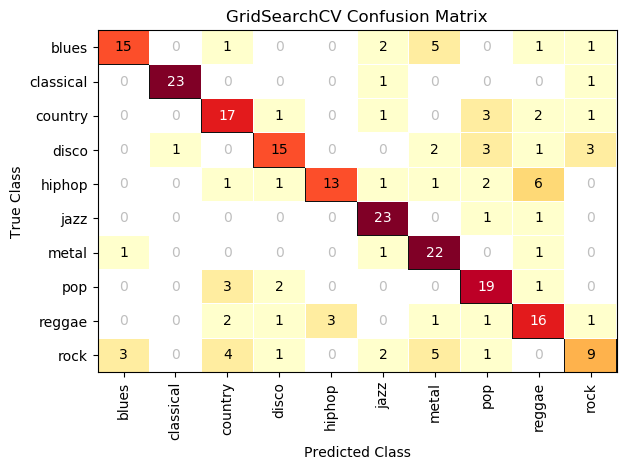

In [12]:
cm_grid_cv = ConfusionMatrix(grid_cv,classes=classes,label_encoder=label_encoder)
cm_grid_cv.score(X_test,y_test)
cm_grid_cv.show();

Let's fine tune our model to see if we can find a better C parameter.

In [14]:
fine_grid = {
    'logreg__C': [0.1,0.5,1,2,3,4,5,6,7,8,9,10]
}
fine_grid_cv = GridSearchCV(logreg_pipe, fine_grid, cv=5, return_train_score=True)
fine_grid_cv.fit(X_train,y_train);

In [15]:
fine_cv_results = pd.DataFrame(fine_grid_cv.cv_results_)
fine_cv_results[cols].sort_values('mean_test_score', ascending=False)

,mean_test_score,param_logreg__C
1,0.692000,0.5
0,0.692000,0.1
3,0.689333,2
2,0.685333,1
4,0.682667,3
5,0.666667,4
6,0.666667,5
7,0.664000,6
8,0.661333,7
9,0.660000,8


/Users/jasonola/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/Users/jasonola/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


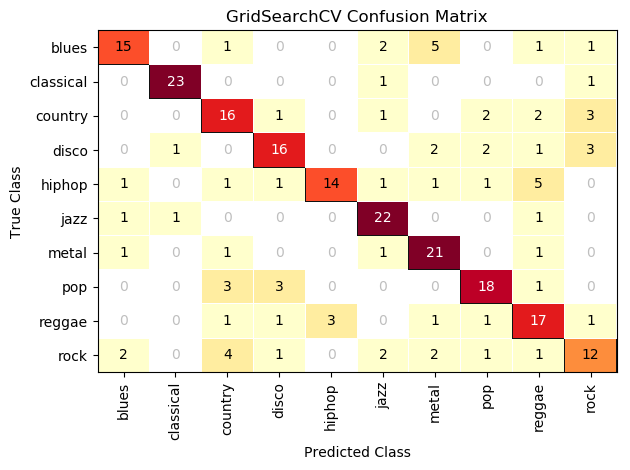

In [16]:
cm_fine_grid_cv = ConfusionMatrix(fine_grid_cv,classes=classes,label_encoder=label_encoder)
cm_fine_grid_cv.score(X_test,y_test)
cm_fine_grid_cv.show();

/Users/jasonola/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


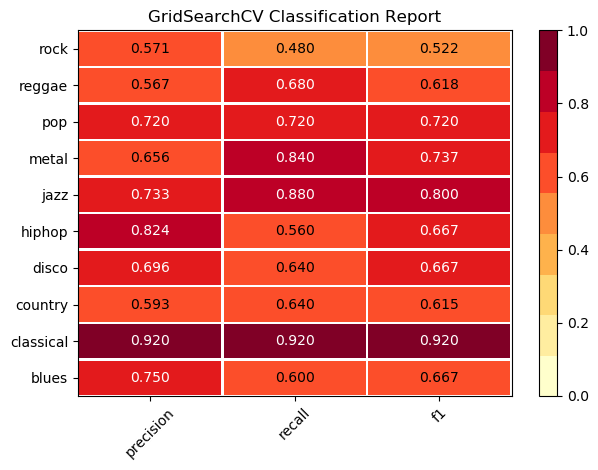

In [17]:
report = ClassificationReport(fine_grid_cv,encoder=label_encoder)
report.fit(X_train,y_train)
report.score(X_test,y_test)
report.show();

Here is a classification report where we see precision, recall and f1 score.  
Precision is the proportion of true positive with true positive and false positive  
Recall is the proportion of true positive with the relevant instances (true positive and false negative)  
f1 score is the harmonic mean of precision and recall.  

We see that we already have good results on most genres, however the model struggles with rock as it has been only been classified right half the time and mixed up with almost all other genres, especially country.  
The model does well to classify classical and jazz. It would be nice to see if the other models have similar problems.

Let's also see what happens after a PCA :

In [19]:
logreg_pipe = Pipeline([
    ("pca",PCA(n_components=5)),
    ("logreg",fine_grid_cv)
])

/Users/jasonola/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


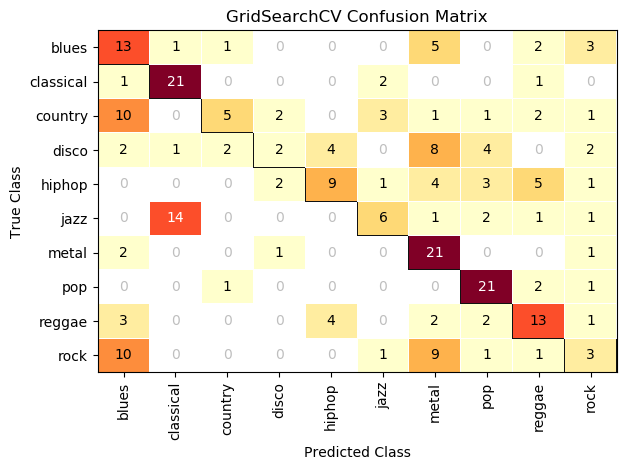

In [20]:
cm_logreg_pipe = ConfusionMatrix(logreg_pipe,classes=classes,label_encoder=label_encoder)
cm_logreg_pipe.fit(X_train,y_train)
cm_logreg_pipe.score(X_test,y_test)
cm_logreg_pipe.show();

Ok we see that applying PCA makes a worse confusion matrix, which mean we actually need all our features to be able to distinguish precisely between our different genres.  